In [6]:
library(tidyverse)
library(tidytext)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors


### Get and Clean Data

In [48]:
# Size in mb
file.size('data/en_US.news.txt')/1000/1000

[1] 205.8119

In [120]:
# Blogs
blogs <- read_lines('data/en_US.blogs.txt') |> tibble(text = _)
blogs[1:3,]

# A tibble: 3 × 1
  text                                                                                                             
  <chr>                                                                                                            
1 In the years thereafter, most of the Oil fields and platforms were named after pagan “gods”.                     
2 We love you Mr. Brown.                                                                                           
3 Chad has been awesome with the kids and holding down the fort while I work later than usual! The kids have been …

In [79]:
# News
news <- read_lines('data/en_US.news.txt') |> tibble(text = _)
news[1:3,]

# A tibble: 3 × 1
  text                                                                          
  <chr>                                                                         
1 He wasn't home alone, apparently.                                             
2 The St. Louis plant had to close. It would die of old age. Workers had been m…
3 WSU's plans quickly became a hot topic on local online sites. Though most peo…

In [80]:
# Tweets
# read_lines flags a warning, but there are no problems reported
tweets <- read_lines('data/en_US.twitter.txt') |> tibble(text = _)
tweets[1:3,]

Warning message:
One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat) 


# A tibble: 3 × 1
  text                                                                          
  <chr>                                                                         
1 How are you? Btw thanks for the RT. You gonna be in DC anytime soon? Love to …
2 When you meet someone special... you'll know. Your heart will beat more rapid…
3 they've decided its more fun if I don't.                                      

In [81]:
tweets |> dim()

[1] 2360148       1

### Quiz Questions

In [121]:
df <- tibble(
  type = c('blogs','news','tweets'),
  data = list(blogs, news, tweets)
)
df

# A tibble: 3 × 2
  type   data                    
  <chr>  <list>                  
1 blogs  <tibble [899,288 × 1]>  
2 news   <tibble [1,010,242 × 1]>
3 tweets <tibble [2,360,148 × 1]>

In [123]:
# Longest document in each corpora
df |> rowwise() |>
  mutate(maxLength = max(map_int(data$text, str_length)))

# A tibble: 3 × 3
# Rowwise: 
  type   data                     maxLength
  <chr>  <list>                       <int>
1 blogs  <tibble [899,288 × 1]>       40833
2 news   <tibble [1,010,242 × 1]>     11384
3 tweets <tibble [2,360,148 × 1]>       140

In [126]:
tweets |>
  mutate(
    hasLove = str_detect(text, 'love'),
    hasHate = str_detect(text, 'hate')) |>
  summarize(loveOverHate = sum(hasLove)/sum(hasHate))

# A tibble: 1 × 1
  loveOverHate
         <dbl>
1         4.11

In [128]:
tweets |> filter(str_detect(text, 'biostats'))

# A tibble: 1 × 1
  text                                                                       
  <chr>                                                                      
1 i know how you feel.. i have biostats on tuesday and i have yet to study =/

In [131]:
tweets |>
  filter(
    str_detect(
      text,
      'A computer once beat me at chess, but it was no match for me at kickboxing'))

# A tibble: 3 × 1
  text                                                                      
  <chr>                                                                     
1 A computer once beat me at chess, but it was no match for me at kickboxing
2 A computer once beat me at chess, but it was no match for me at kickboxing
3 A computer once beat me at chess, but it was no match for me at kickboxing

### Exploratory Data Analysis

In [148]:
# General stats for each corpora
df |>
  rowwise() |>
  mutate(
    avgLength = mean(map_int(data$text, str_length)),
    minLength = min(map_int(data$text, str_length)),
    maxLength = max(map_int(data$text, str_length)))

# A tibble: 3 × 5
# Rowwise: 
  type   data                     avgLength minLength maxLength
  <chr>  <list>                       <dbl>     <int>     <int>
1 blogs  <tibble [899,288 × 1]>       230.          1     40833
2 news   <tibble [1,010,242 × 1]>     201.          1     11384
3 tweets <tibble [2,360,148 × 1]>      68.7         2       140

In [167]:
# Write function to export word frequency list and a chart
printWfWithChart <- function(df) {
  dfWf <- df |>
  unnest_tokens(word, text) |>
  anti_join(stop_words, by = 'word') |>
  count(word, sort=TRUE)
  print(dfWf)

  dfWf |> slice_max(order_by=n, n = 15) |>
  ggplot(aes(n, fct_reorder(word, n), fill = word)) + geom_col(show.legend=FALSE) +
  labs(x='Word Frequency (n)', y= 'Word')
}

# A tibble: 319,283 × 2
   word       n
   <chr>  <int>
 1 time   90918
 2 people 59574
 3 day    52372
 4 love   45230
 5 life   41251
 6 it’s   38657
 7 1      30907
 8 2      29561
 9 world  29305
10 i’m    29189
# ℹ 319,273 more rows
# ℹ Use `print(n = ...)` to see more rows


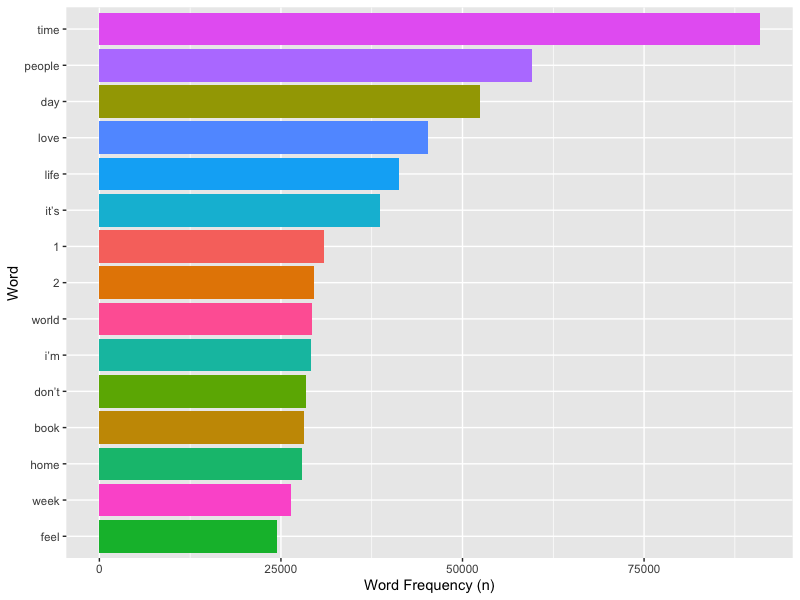

In [168]:
blogs |> printWfWithChart()

# A tibble: 283,812 × 2
   word        n
   <chr>   <int>
 1 time    57062
 2 people  47666
 3 city    37953
 4 1       37292
 5 school  35498
 6 game    34949
 7 percent 34690
 8 day     31901
 9 2       31784
10 million 30914
# ℹ 283,802 more rows
# ℹ Use `print(n = ...)` to see more rows


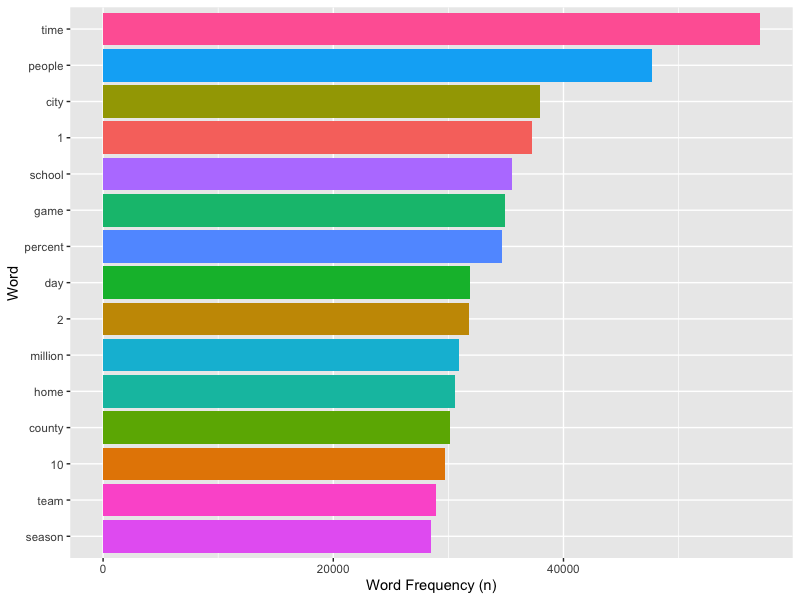

In [169]:
news |> printWfWithChart()

# A tibble: 369,663 × 2
   word        n
   <chr>   <int>
 1 love   106721
 2 day     91710
 3 rt      89537
 4 time    76794
 5 lol     70133
 6 3       54940
 7 people  52040
 8 happy   48998
 9 follow  48104
10 2       45515
# ℹ 369,653 more rows
# ℹ Use `print(n = ...)` to see more rows


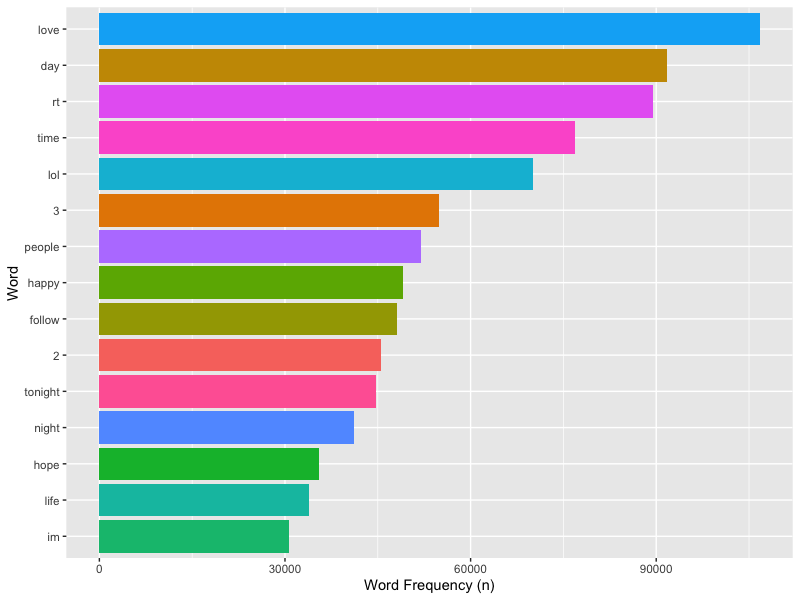

In [170]:
tweets |> printWfWithChart()

In [ ]:
# Most frequent n-grams for tweets
tweets |>
  unnest_tokens(word, text) |>
  anti_join(stop_words, by = 'word') |>
  count(word, sort=TRUE)
  print(dfWf)